Zadanie 1a (3 pkt) Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy KnapSack - solve_knapsack_brute_force oraz solve_knapsack_pw_ratio. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka.

In [2]:
import numpy as np
import itertools
import gc
import time
import random
from matplotlib import pyplot as plt

In [3]:
class Benchmark:
    def init(self):
        self._time = 0
        self._start_time = 0

    def get_time(self):
        return self._time

    def start(self):
        self._gc_old = gc.isenabled()
        gc.disable()
        self._start_time = time.process_time()

    def stop(self):
        stop_time = time.process_time()
        if self._gc_old:
            gc.enable()
        self._time = stop_time - self._start_time



*   Rozwiązanie problemu metodą brute force
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi



In [17]:
class KnapSack:
    def __init__(self, profits, weights, capacity):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity

    def add_random_item(self):
        self.profits = np.append(self.profits, np.array(random.randint(1, 10)))
        self. weights = np.append(self.weights, np.array(random.randint(1, 20)))
        self.capacity += random.randint(1, 10)

    def solve_knapsack_brute_force(self):
        num_of_elements = len(self.weights)
        combinations = np.array(list(itertools.product([1, 0], repeat=num_of_elements)))
        result = []
        max_profit = 0
        max_weight = 0
        best_combination = ()
        for combination in combinations:
            temp_weight = sum([(self.weights[i]*combination[i]) for i in range(num_of_elements)])
            temp_profit = sum([(self.profits[i]*combination[i]) for i in range(num_of_elements)])
            if temp_weight <= self.capacity and temp_profit > max_profit:
                max_weight = temp_weight
                max_profit = temp_profit
                best_combination = combination
        for i in range(num_of_elements):
            if best_combination[i]:
                result.append(i)
        return result, max_profit, max_weight

    def solve_knapsack_pw_ratio(self):
        pw_ratio = np.array([self.profits[i]/self.weights[i] for i in range(len(self.weights))])
        dtype = [('proportion', float), ('profit', int), ('weight', int), ('index', int)]
        zipped = np.array([(pw_ratio[i], self.profits[i], self.weights[i], i) for i in range(len(self.weights))], dtype)
        zipped = np.flip(np.sort(zipped, order=['proportion', 'profit']))
        max_weight = 0
        max_profit = 0
        result = []
        for element in zipped:
            if element['weight'] + max_weight <= self.capacity:
                max_weight += element['weight']
                max_profit += element['profit']
                result.append(element['index'])
        return sorted(result), max_profit, max_weight

In [18]:
weights = np.array([8, 3, 5, 2])
profits = np.array([16, 8, 9, 6])
capacity = 9

knapsack = KnapSack(profits, weights, capacity)

print('([combination], profit, weight)', '(1) brute_force', '(2) pw_ratio', sep='\n')
print()
for i in range(10):
    print(knapsack.solve_knapsack_brute_force(), knapsack.solve_knapsack_pw_ratio(), sep='\n')
    print()
    knapsack.add_random_item()

([combination], profit, weight)
(1) brute_force
(2) pw_ratio

([1, 2], 17, 8)
([1, 3], 14, 5)

([0, 1], 24, 11)
([1, 2, 3], 23, 10)

([0, 1, 2, 3], 39, 18)
([0, 1, 2, 3], 39, 18)

([0, 1, 2, 3], 39, 18)
([0, 1, 2, 3], 39, 18)

([0, 1, 2, 3, 6], 45, 30)
([0, 1, 2, 3, 7], 45, 22)

([0, 1, 2, 3, 6, 7], 51, 34)
([0, 1, 2, 3, 6, 7], 51, 34)

([0, 1, 2, 3, 4, 7], 54, 42)
([0, 1, 2, 3, 6, 7, 9], 54, 42)

([0, 1, 2, 3, 4, 7, 9], 57, 50)
([0, 1, 2, 3, 6, 7, 9, 10], 56, 45)

([0, 1, 2, 3, 4, 6, 7, 11], 65, 59)
([0, 1, 2, 3, 6, 7, 8, 9, 10, 11], 62, 58)

([0, 1, 2, 3, 4, 7, 9, 10, 11, 12], 72, 62)
([0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12], 70, 62)



Metoda rozwiązania zadania "brute_force" polega na utworzeniu wszystkich możliwych kombinacji rzeczy, które potencjalnie mogłyby znaleźć się w plecaku. Następnie wszystkie kombinacje są sprawdzane i wybrana zostaje najlepsza.
Metoda "brute_force" znajduje najlepsze rozwiązanie za każdym razem, jednak ilość wykonywanych obliczeń przy jej wykorzystaniu rośnie wykładniczo.

Metoda rozwiązania zadania przy użyciu heurystyki polega na dodawaniu do plecaka przedmiotów, w kolejności malejącego stosunku wartość/waga. Takie rozwiązanie nie zawsze otrzyma najlepszy wynik, jednak w porównaniu do metody "brute_force" takie podejście jest dużo szybsze.

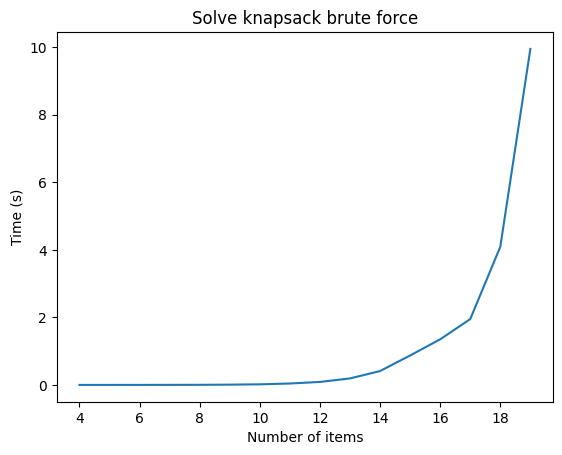

In [12]:
knapsack2 = KnapSack(profits, weights, capacity)
timer = Benchmark()
time_measurements = []

for i in range(16):
    timer.start()
    knapsack2.solve_knapsack_brute_force()
    timer.stop()
    time_measurements.append(timer.get_time())
    knapsack2.add_random_item()
plt.ylabel("Time (s)")
plt.xlabel("Number of items")
plt.title("Solve knapsack brute force")
plt.plot([x for x in range(4, 20, 1)], time_measurements)
plt.show()